<center><u><H1>Series de Tiempo con Pandas</H1></u></center>

In [1]:
#Librerias
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [7]:
#Datetime se usa para manejar fechas y horas
#De String a datetime
datetime.datetime(2019, 1, 1)

datetime.datetime(2019, 1, 1, 0, 0)

In [8]:
# working with string dates: converting string to dates
#Convertir strings a fechas y dar formato
datetime.datetime.strptime("2019/1/1", "%Y/%m/%d")

datetime.datetime(2019, 1, 1, 0, 0)

In [6]:
#Coonvertir fechas a string
datetime.datetime(2019,1,1,0,0).strftime("%Y%m%d")

'20190101'

### to_datetime function(Funciones con fechas):

### arg : integer, float, string, datetime, list, tuple, 1-d array, Series

In [9]:
#De string  a timestamp similar a datetime
pd.to_datetime("15.02.2019")

Timestamp('2019-02-15 00:00:00')

In [10]:
#De string  a timestamp similar a datetime
#Acepta  //
pd.to_datetime("12/24/2019")

Timestamp('2019-12-24 00:00:00')

In [11]:
# Fecha cambiando la posicion del mes por el dia
pd.to_datetime("07/04/2019", dayfirst=True)

Timestamp('2019-04-07 00:00:00')

### Timestamp(Lo usaremos como indice en un dataframe):

#### Timestamp objects are panda's version of datetime objects. 
#### Timestamp class is a subclass of datetime

In [15]:
#Creamos el indice de un dataframe mediante fechas
#Timestamp reconoce guien medio" "-"
index = [pd.Timestamp("2019-01-01"),
        pd.Timestamp("2019-01-02"),
        pd.Timestamp("2019-01-03")]

In [14]:
#Creamos una serie con valores random del tamaño del indice creado
#Asignamos los indices a la serie
ts = pd.Series(np.random.randn(len(index)), index=index)
ts

2019-01-01    0.410762
2019-01-02   -0.467242
2019-01-03    0.850242
dtype: float64

In [16]:
#Obtener informacion de los indices
ts.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03'], dtype='datetime64[ns]', freq=None)

In [17]:
#Indice con fechas
index = pd.to_datetime(["2019-01-01", "2019-01-02", "2019-01-03"])

In [19]:
#Crear una serie con index de fechas
ts = pd.Series(np.random.randn(len(index)), index=index)

In [13]:
ts.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03'], dtype='datetime64[ns]', freq=None)

### date_range Periodos

In [26]:
#Generar pediodos de tiempo a partir de una fecha ingresada
rng = pd.date_range('10/3/2022', periods=13, freq='M')
rng

DatetimeIndex(['2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31'],
              dtype='datetime64[ns]', freq='M')

In [22]:
#TIPOS DE FRECUENCIA QUE SE PUEDEN UTILIZAR
#Alias	Description
#B	business day frequency
#C	custom business day frequency
#D	calendar day frequency
#W	weekly frequency
#M	month end frequency
#SM	semi-month end frequency (15th and end of month)
#BM	business month end frequency
#CBM	custom business month end frequency
#MS	month start frequency
#SMS	semi-month start frequency (1st and 15th)
#BMS	business month start frequency
#CBMS	custom business month start frequency
#Q	quarter end frequency
#BQ	business quarter end frequency
#QS	quarter start frequency
#BQS	business quarter start frequency
#A, Y	year end frequency
#BA, BY	business year end frequency
#AS, YS	year start frequency
#BAS, BYS	business year start frequency
#BH	business hour frequency
#H	hourly frequency
#T, min	minutely frequency
#S	secondly frequency
#L, ms	milliseconds
#U, us	microseconds
#N	nanoseconds

In [28]:
#Serie de pandas del ejemplo anterior con numeros aleatorios
ts = pd.Series(np.random.randint(0, 100, len(rng)), index=rng)
ts.head()

2022-10-31    50
2022-11-30    72
2022-12-31    43
2023-01-31    61
2023-02-28    69
Freq: M, dtype: int32

In [29]:
#Converting between time span representations
#Mostrar solo años y meses con "to_period()"
ps = ts.to_period()
ps.head()

2022-10    50
2022-11    72
2022-12    43
2023-01    61
2023-02    69
Freq: M, dtype: int32

In [30]:
#Exportamos informacion del archivo csv AirPassengers
df = pd.read_csv('../data\AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [31]:
#indices como fechas
dateparse = lambda date: pd.datetime.strptime(date, '%Y-%m')
df = pd.read_csv('../data/AirPassengers.csv', parse_dates=True, index_col='Month',date_parser=dateparse)
df.head()

C:\Users\julio\AppData\Local\Temp/ipykernel_21168/2114188792.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda date: pd.datetime.strptime(date, '%Y-%m')


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [34]:
#Specify the entire range:
#Buscar por indice de fechas
#Fecha inicial y fecha termino
df['1960-01-01':'1960-12-01']

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [35]:
#df['1960-01-01':] si no se especifica buscara desde la fecha inicial hasta el ultimo registro
#Use ':' if one of the indices is at ends:
df['1960-06-01':]

,#Passengers
Month,
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [36]:
#Extrear por año especifico
# extract values from a specific year
df['1950']

C:\Users\julio\AppData\Local\Temp/ipykernel_21168/215294939.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['1950']


,#Passengers
Month,
1950-01-01,115
1950-02-01,126
1950-03-01,141
1950-04-01,135
1950-05-01,125
1950-06-01,149
1950-07-01,170
1950-08-01,170
1950-09-01,158


<AxesSubplot:xlabel='Month'>

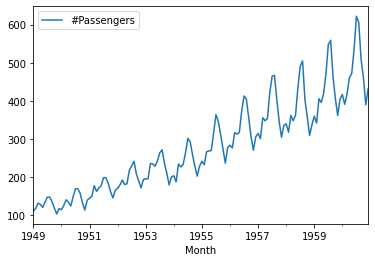

In [37]:
#Mostrar en graficas el dataframe del ejemplo pasado
df.plot()

<AxesSubplot:xlabel='Month'>

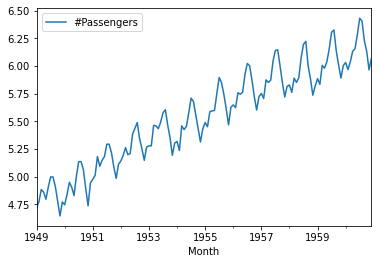

In [38]:
#Atenuacion de la varianza de la data
ts_log = np.log(df)
ts_log.plot()

In [42]:
#Serie estacionaria, debido a que la grafica no muestra una tendencia
#obtenemos la media
moving_avg = ts_log.rolling(window=12,center=False).mean()
moving_avg

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,6.124517
1960-09-01,6.132246
1960-10-01,6.142628


In [43]:
#Quitamos las tendencias de la grafica
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


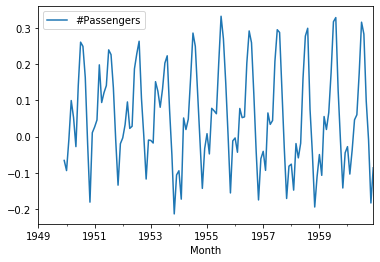

In [27]:
#Mostramos la grafica sin tendencia para poder inspeccionar mejo
ts_log_moving_avg_diff.plot()

## Reference:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-alliases